# Data Hackathon 3.x Data Preparation

## Load Libraries:

In [58]:
import pandas as pd
import numpy as np
%matplotlib inline

In [59]:
#Load data:
# train = pd.read_csv('Train_nyOWmfK.csv', error_bad_lines=False)
train = pd.read_csv('Test_bCtAN1w.csv')
test = pd.read_csv('Test_bCtAN1w.csv')

In [60]:
train.shape, test.shape

((37717, 24), (37717, 24))

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37717 entries, 0 to 37716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     37717 non-null  object 
 1   Gender                 37717 non-null  object 
 2   City                   37319 non-null  object 
 3   Monthly_Income         37717 non-null  int64  
 4   DOB                    37717 non-null  object 
 5   Lead_Creation_Date     37717 non-null  object 
 6   Loan_Amount_Applied    37677 non-null  float64
 7   Loan_Tenure_Applied    37677 non-null  float64
 8   Existing_EMI           37677 non-null  float64
 9   Employer_Name          37675 non-null  object 
 10  Salary_Account         32680 non-null  object 
 11  Mobile_Verified        37717 non-null  object 
 12  Var5                   37717 non-null  int64  
 13  Var1                   37717 non-null  object 
 14  Loan_Amount_Submitted  22795 non-null  float64
 15  Lo

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37717 entries, 0 to 37716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     37717 non-null  object 
 1   Gender                 37717 non-null  object 
 2   City                   37319 non-null  object 
 3   Monthly_Income         37717 non-null  int64  
 4   DOB                    37717 non-null  object 
 5   Lead_Creation_Date     37717 non-null  object 
 6   Loan_Amount_Applied    37677 non-null  float64
 7   Loan_Tenure_Applied    37677 non-null  float64
 8   Existing_EMI           37677 non-null  float64
 9   Employer_Name          37675 non-null  object 
 10  Salary_Account         32680 non-null  object 
 11  Mobile_Verified        37717 non-null  object 
 12  Var5                   37717 non-null  int64  
 13  Var1                   37717 non-null  object 
 14  Loan_Amount_Submitted  22795 non-null  float64
 15  Lo

In [63]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(75434, 25)

## Check missing:

In [64]:
data.apply(lambda x: sum(x.isnull()))

ID                           0
Gender                       0
City                       796
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         80
Loan_Tenure_Applied         80
Existing_EMI                80
Employer_Name               84
Salary_Account           10074
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    29844
Loan_Tenure_Submitted    29844
Interest_Rate            51214
Processing_Fee           51492
EMI_Loan_Submitted       51214
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
source                       0
dtype: int64

## Look at categories of all object variables:

In [65]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print '\nFrequency count for variable %s'%v
    print data[v].value_counts()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('\nFrequency count for variable %s'%v)? (<ipython-input-65-5cd257e6b175>, line 3)

## Handle Individual Variables:

### City Variable:

In [66]:
len(data['City'].unique())
#drop city because too many unique
data.drop('City',axis=1,inplace=True)

### Determine Age from DOB

In [67]:
data['DOB'].head()

0    03-Apr-87
1    12-May-80
2    19-Sep-89
3    15-Aug-91
4    22-Jul-87
Name: DOB, dtype: object

In [68]:
#Create age variable:
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()

0    28
1    35
2    26
3    24
4    28
Name: Age, dtype: int64

In [69]:
#drop DOB:
data.drop('DOB',axis=1,inplace=True)

### EMI_Load_Submitted

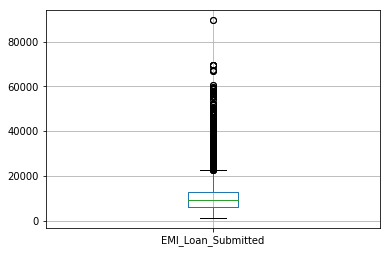

In [70]:
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [71]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,2649.39,0
1,19849.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,NaN,1
6,NaN,1
7,NaN,1
8,NaN,1
9,NaN,1


In [72]:
#drop original vaiables:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

### Employer Name

In [73]:
len(data['Employer_Name'].value_counts())

22521

In [74]:
#I'll drop the variable because too many unique values. Another option could be to categorize them manually
data.drop('Employer_Name',axis=1,inplace=True)

### Existing EMI

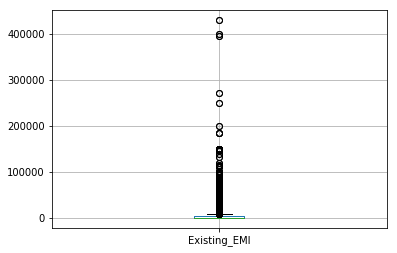

In [75]:
data.boxplot(column='Existing_EMI',return_type='axes')

In [76]:
data['Existing_EMI'].describe()

count     75354.000000
mean       3498.142270
std        9857.405488
min           0.000000
25%           0.000000
50%           0.000000
75%        3500.000000
max      430000.000000
Name: Existing_EMI, dtype: float64

In [77]:
#Impute by median (0) because just 111 missing:
data['Existing_EMI'].fillna(0, inplace=True)

### Interest Rate:

In [78]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print data[['Interest_Rate','Interest_Rate_Missing']].head(10)

SyntaxError: invalid syntax (<ipython-input-78-d1a723fda344>, line 3)

In [79]:
data.drop('Interest_Rate',axis=1,inplace=True)

### Lead Creation Date:

In [80]:
#Drop this variable because doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)

### Loan Amount and Tenure applied:

In [81]:
#Impute with median because only 111 missing:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

### Loan Amount and Tenure selected

In [82]:
#High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [83]:
#Remove old vars
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

### Remove logged-in

In [85]:
# data.drop('LoggedIn',axis=1,inplace=True)

### Remove salary account

In [86]:
#Salary account has mnay banks which have to be manually grouped
data.drop('Salary_Account',axis=1,inplace=True)

### Processing_Fee

In [87]:
#High proportion missing so create a new var whether present or not
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
data.drop('Processing_Fee',axis=1,inplace=True)

### Source

In [88]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      33364
S133      26030
others    16040
Name: Source, dtype: int64

## Final Data:

In [89]:
data.apply(lambda x: sum(x.isnull()))

ID                               0
Gender                           0
Monthly_Income                   0
Loan_Amount_Applied              0
Loan_Tenure_Applied              0
Existing_EMI                     0
Mobile_Verified                  0
Var5                             0
Var1                             0
Filled_Form                      0
Device_Type                      0
Var2                             0
Source                           0
Var4                             0
source                           0
Age                              0
EMI_Loan_Submitted_Missing       0
Loan_Amount_Submitted_Missing    0
Loan_Tenure_Submitted_Missing    0
Processing_Fee_Missing           0
dtype: int64

In [90]:
data.dtypes

ID                                object
Gender                            object
Monthly_Income                     int64
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Existing_EMI                     float64
Mobile_Verified                   object
Var5                               int64
Var1                              object
Filled_Form                       object
Device_Type                       object
Var2                              object
Source                            object
Var4                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

### Numerical Coding:

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

### One-Hot Coding

In [92]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['ID', 'Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Var4', 'source', 'Age',
       'EMI_Loan_Submitted_Missing', 'Loan_Amount_Submitted_Missing',
       'Loan_Tenure_Submitted_Missing', 'Processing_Fee_Missing',
       'Device_Type_0', 'Device_Type_1', 'Filled_Form_0', 'Filled_Form_1',
       'Gender_0', 'Gender_1', 'Var1_0', 'Var1_1', 'Var1_2', 'Var1_3',
       'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7', 'Var1_8', 'Var1_9', 'Var1_10',
       'Var1_11', 'Var1_12', 'Var1_13', 'Var1_14', 'Var1_15', 'Var1_16',
       'Var1_17', 'Var1_18', 'Var2_0', 'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4',
       'Var2_5', 'Var2_6', 'Mobile_Verified_0', 'Mobile_Verified_1',
       'Source_0', 'Source_1', 'Source_2'],
      dtype='object')

### Separate train & test:

In [93]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37717 entries, 0 to 37716
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             37717 non-null  object 
 1   Monthly_Income                 37717 non-null  int64  
 2   Loan_Amount_Applied            37717 non-null  float64
 3   Loan_Tenure_Applied            37717 non-null  float64
 4   Existing_EMI                   37717 non-null  float64
 5   Var5                           37717 non-null  int64  
 6   Var4                           37717 non-null  int64  
 7   source                         37717 non-null  object 
 8   Age                            37717 non-null  int64  
 9   EMI_Loan_Submitted_Missing     37717 non-null  int64  
 10  Loan_Amount_Submitted_Missing  37717 non-null  int64  
 11  Loan_Tenure_Submitted_Missing  37717 non-null  int64  
 12  Processing_Fee_Missing         37717 non-null 

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37717 entries, 37717 to 75433
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             37717 non-null  object 
 1   Monthly_Income                 37717 non-null  int64  
 2   Loan_Amount_Applied            37717 non-null  float64
 3   Loan_Tenure_Applied            37717 non-null  float64
 4   Existing_EMI                   37717 non-null  float64
 5   Var5                           37717 non-null  int64  
 6   Var4                           37717 non-null  int64  
 7   source                         37717 non-null  object 
 8   Age                            37717 non-null  int64  
 9   EMI_Loan_Submitted_Missing     37717 non-null  int64  
 10  Loan_Amount_Submitted_Missing  37717 non-null  int64  
 11  Loan_Tenure_Submitted_Missing  37717 non-null  int64  
 12  Processing_Fee_Missing         37717 non-n

In [98]:
test["source"]

37717    test
37718    test
37719    test
37720    test
37721    test
         ... 
75429    test
75430    test
75431    test
75432    test
75433    test
Name: source, Length: 37717, dtype: object

In [99]:
train["Disbursed"]

KeyError: 'Disbursed'

In [46]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

/Users/guohua08/miniconda3/envs/DRL_env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


KeyError: "['Disbursed'] not found in axis"

In [47]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)